In [26]:
# Importar as bibliotecas para a modelagem e visualização de gráficos
from pulp import LpMaximize, LpMinimize, LpProblem, LpStatus, lpSum, LpVariable
from pulp import GLPK
import matplotlib.pyplot as plt

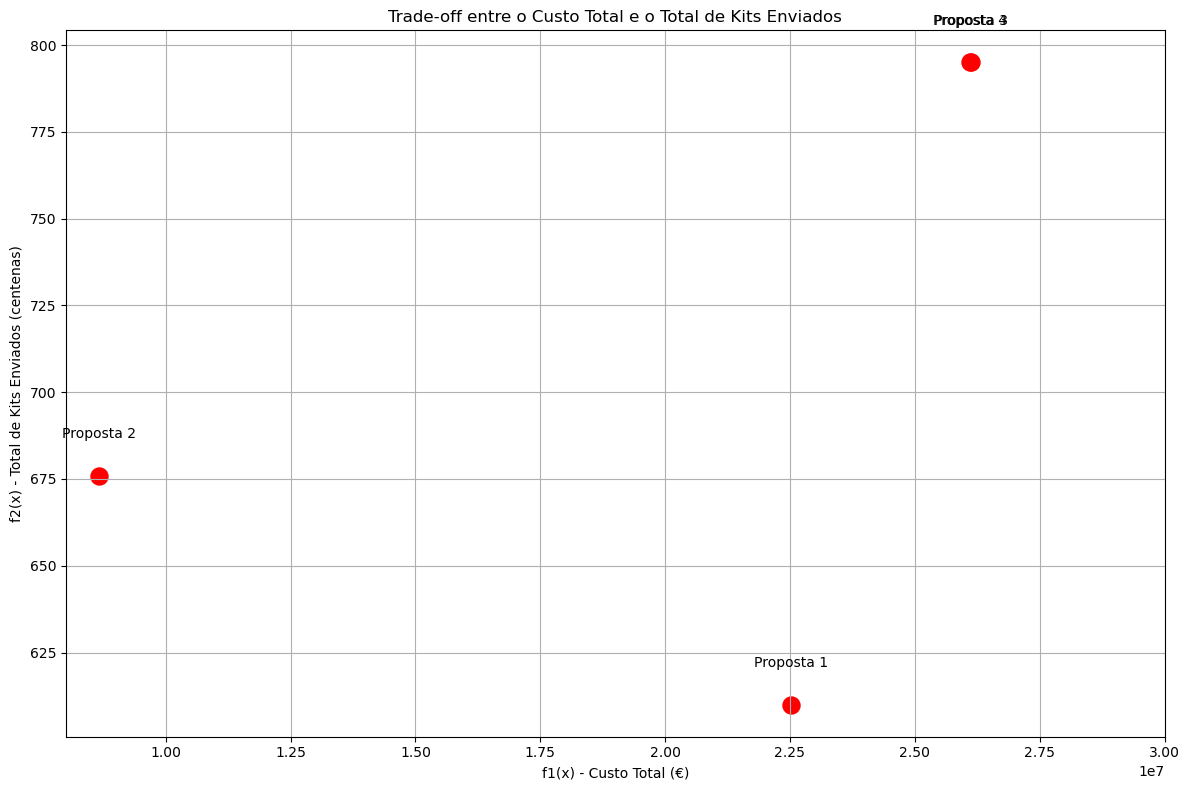

In [28]:
#Questão b) 
#
# Gráfico do Trade-off entre o Custo Total e o Total de Kits Enviados para as propostas
#
# Definir os valores das funções objetivo para cada proposta
propostas = {
    "Proposta 1": (22530000, 610),
    "Proposta 2": (8670000, 676),
    "Proposta 3": (26120000, 795),
    "Proposta 4": (26100000, 795)
}
#
# Obter os valores de f1(x) e f2(x) para cada proposta
f1_values = [value[0] for value in propostas.values()]
f2_values = [value[1] for value in propostas.values()]
#
# Criação do gráfico
#
# Inserir os pontos no gráfico
plt.figure(figsize=(12, 8))
plt.scatter(f1_values, f2_values, color='red', s=150)
#
# Adicionar legendas aos pontos com alguma separação
for proposta, (f1, f2) in propostas.items():
    plt.text(f1, f2 + 10, proposta, ha='center', va='bottom')
#
# Adicionar legendas aos eixos
plt.xlabel('f1(x) - Custo Total (€)')
plt.ylabel('f2(x) - Total de Kits Enviados (centenas)')
plt.title('Trade-off entre o Custo Total e o Total de Kits Enviados')
#
# Definir intervalo do eixo do x
plt.xlim(8000000, 30000000)
#
# Mostrar o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
#Questão c) (i)
#
# Criar o modelo 1 de minimização em programação linear
model_1 = LpProblem(name="Custo Ajuda Humanitária", sense=LpMinimize)
#
# Inicializar as variáveis de decisão
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)} #Variável xi representa a quantidade em centenas de cada tipo de kit a ser enviado
                                                                    # x[1]: quantidade de kits básicos
                                                                    # x[2]: quantidade de kits avançados
                                                                    # x[3]: quantidade de kits premium
                                                                    #"lowBound=0" representa a restrição R4 de todas as variáveis serem >= 0
# 
# Adicionar as restrições ao modelo
model_1 += (12 * x[1] + 18 * x[2] + 22 * x[3] <= 10000, "carga_transportada")   #R1: A carga total transportada não pode ultrapassar as 10000 toneladas
model_1 += (3000 * x[1] + 3500 * x[2] + 5400 * x[3] >= 2100000, "pessoas_ajudadas") #R2: O total de pessoas ajudadas deve ser pelo menos 2100000
model_1 += (x[3] >= 30, "minimo_kits_premium") #R3: Devem ser enviados pelo menos 30 centenas de kits premium
#
# Adicionar a função objetivo ao modelo
obj_func = 30000 * x[1] + 35000 * x[2] + 105000 * x[3] #F1: Custo total do envio dos kits em euros
#
model_1 += obj_func
#
# Formulação (visualização do modelo matemático de forma a conferir os dados)
model_1

Custo_Ajuda_Humanitária:
MINIMIZE
30000*x1 + 35000*x2 + 105000*x3 + 0
SUBJECT TO
carga_transportada: 12 x1 + 18 x2 + 22 x3 <= 10000

pessoas_ajudadas: 3000 x1 + 3500 x2 + 5400 x3 >= 2100000

minimo_kits_premium: x3 >= 30

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous

In [33]:
#Questão c) (i)
#
# Resolver o problema do modelo 1
status = model_1.solve()
#
# Outputs
#
# Valor ótimo do problema
print(f"objective: {model_1.objective.value()}")
#
# Solução ótima
# Valores ótimos das variáveis de decisão
for var in x.values():
 print(f"{var.name}: {var.value()}")
#
# Valores das variáveis de desvio
for name, constraint in model_1.constraints.items():
 print(f"{name}: {constraint.value()}") 

objective: 22530000.0
x1: 646.0
x2: 0.0
x3: 30.0
carga_transportada: -1588.0
pessoas_ajudadas: 0.0
minimo_kits_premium: 0.0


In [35]:
#Questão c) (ii)
#
# Criar o modelo 2 de maximização em programação linear
model_2 = LpProblem(name="Kits Ajuda Humanitária", sense=LpMaximize)

# Inicializar as variáveis de decisão
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}  #Variável xi representa a quantidade em centenas de cada tipo de kit a ser enviado
                                                                    # x[1]: quantidade de kits básicos
                                                                    # x[2]: quantidade de kits avançados
                                                                    # x[3]: quantidade de kits premium
                                                                    #"lowBound=0" representa a restrição R4 de todas as variáveis serem >= 0
# 
# Adicionar as restrições ao modelo
model_2 += (12 * x[1] + 18 * x[2] + 22 * x[3] <= 10000, "carga_transportada")   # R1: A carga total transportada não pode ultrapassar as 10000 toneladas
model_2 += (3000 * x[1] + 3500 * x[2] + 5400 * x[3] >= 2100000, "pessoas_ajudadas") # R2: O total de pessoas ajudadas deve ser pelo menos 2100000
model_2 += (x[3] >= 30, "minimo_kits_premium") # R3: Devem ser enviados pelo menos 30 centenas de kits premium

#
# Adicionar a função objetivo ao modelo
obj_func = x[1] + x[2] + x[3] #F2: Número total de kits enviados em centenas
#
model_2 += obj_func
#
# Formulação (visualização do modelo matemático de forma a conferir os dados)
model_2

Kits_Ajuda_Humanitária:
MAXIMIZE
1*x1 + 1*x2 + 1*x3 + 0
SUBJECT TO
carga_transportada: 12 x1 + 18 x2 + 22 x3 <= 10000

pessoas_ajudadas: 3000 x1 + 3500 x2 + 5400 x3 >= 2100000

minimo_kits_premium: x3 >= 30

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous

In [36]:
#Questão c) (ii)
#
# Resolver o problema do modelo 2
status = model_2.solve()
#
# Outputs
#
# Valor ótimo do problema
print(f"objective: {model_2.objective.value()}")
#
# Solução ótima
# Valores ótimos das variáveis de decisão
for var in x.values():
 print(f"{var.name}: {var.value()}")
#
# Valores das variáveis de desvio
for name, constraint in model_2.constraints.items():
 print(f"{name}: {constraint.value()}") 

objective: 808.33333
x1: 778.33333
x2: 0.0
x3: 30.0
carga_transportada: -3.9999998989515007e-05
pessoas_ajudadas: 396999.9900000002
minimo_kits_premium: 0.0


In [37]:
#Questão d) 
#
# Criar o modelo 3 de minimização em programação linear não preemptiva
model_3 = LpProblem(name="Ajuda Humanitária 3", sense=LpMinimize)

# Inicializar as variáveis de decisão
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}#Variável xi representa a quantidade em centenas de cada tipo de kit a ser enviado
                                                                    # x[1]: quantidade de kits básicos
                                                                    # x[2]: quantidade de kits avançados
                                                                    # x[3]: quantidade de kits premium
                                                                    #"lowBound=0" representa a restrição R4 de todas as variáveis serem >= 0
d_1 = {i: LpVariable(name=f"d_1{i}", lowBound=0) for i in range(1, 3)} # Variáveis d_1[i] representa os desvios para o custo
                                                                        # d_1[1]: desvio negativo do custo
                                                                        # d_1[2]: desvio positivo do custo
                                                                        # As variáveis de desvio devem ser não negativas (lowBound=0)
d_2 = {i: LpVariable(name=f"d_2{i}", lowBound=0) for i in range(1, 3)} # Variáveis d_2[i] representa os desvios para o número de kits
                                                                        # d_2[1]: desvio negativo do número de kits
                                                                        # d_2[2]: desvio positivo do número de kits
                                                                        # As variáveis de desvio devem ser não negativas (lowBound=0)
#
# Adicionar as mesmas restrições ao modelo
model_3 += (12 * x[1] + 18 * x[2] + 22 * x[3] <= 10000, "carga_transportada")   #R1: A carga total transportada não pode ultrapassar as 10000 toneladas
model_3 += (3000 * x[1] + 3500 * x[2] + 5400 * x[3] >= 2100000, "pessoas_ajudadas") #R2: O total de pessoas ajudadas deve ser pelo menos 2100000
model_3 += (x[3] >= 30, "minimo_kits_premium") #R3: Devem ser enviados pelo menos 30 centenas de kits premium
model_3 += (30000 * x[1] + 35000 * x[2] +  105000 * x[3] + d_1[1] - d_1[2] == 22500000, "custo_desejado") #R4: Custo total deve ser aproximadamente 22500000 euros
model_3 += (x[1] + x[2] + x[3] + d_2[1] - d_2[2] == 808, "kits_desejados") #R5: Número total de kits deve ser aproximadamente 808 centenas

# Adicionar a  função objetivo ao modelo
obj_func = ((d_1[1] + d_1[2]) * (1/22500000)) + ((d_2[1] + d_2[2]) * (1/808)) #F3: soma não ponderada dos pesos proporcionais aos desvios face
                                                                                    #aos respetivos níveis de aspiração
#
model_3 += obj_func
#
# Formulação (visualização do modelo matemático de forma a conferir os dados)
model_3

Ajuda_Humanitária_3:
MINIMIZE
4.444444444444445e-08*d_11 + 4.444444444444445e-08*d_12 + 0.0012376237623762376*d_21 + 0.0012376237623762376*d_22 + 0.0
SUBJECT TO
carga_transportada: 12 x1 + 18 x2 + 22 x3 <= 10000

pessoas_ajudadas: 3000 x1 + 3500 x2 + 5400 x3 >= 2100000

minimo_kits_premium: x3 >= 30

custo_desejado: d_11 - d_12 + 30000 x1 + 35000 x2 + 105000 x3 = 22500000

kits_desejados: d_21 - d_22 + x1 + x2 + x3 = 808

VARIABLES
d_11 Continuous
d_12 Continuous
d_21 Continuous
d_22 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [38]:
#Questão d) 
#
# Resolver o problema do modelo 3
status = model_3.solve()
#
# Outputs
#
# Valor ótimo do problema
print(f"objective: {model_3.objective.value()}")
#
# Solução ótima
# Valores ótimos das variáveis de decisão
for var in x.values():
 print(f"{var.name}: {var.value()}")
#
# Valores das variáveis de desvio
for name, constraint in model_3.constraints.items():
 print(f"{name}: {constraint.value()}") 

objective: 0.1646996699669967
x1: 646.0
x2: 0.0
x3: 30.0
carga_transportada: -1588.0
pessoas_ajudadas: 0.0
minimo_kits_premium: 0.0
custo_desejado: 0.0
kits_desejados: 0.0


In [39]:
#Questão e) 
#
# Criar o modelo de minimização em programação linear preemptiva
model_4 = LpProblem(name="Ajuda Humanitária 4", sense=LpMinimize)

# Inicializar as variáveis de decisão
x = {i: LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 4)}#Variável xi representa a quantidade em centenas de cada tipo de kit a ser enviado
                                                                    # x[1]: quantidade de kits básicos
                                                                    # x[2]: quantidade de kits avançados
                                                                    # x[3]: quantidade de kits premium
                                                                    #"lowBound=0" representa a restrição R4 de todas as variáveis serem >= 0
d_1 = {i: LpVariable(name=f"d_1{i}", lowBound=0) for i in range(1, 3)} # Variáveis d_1[i] representa os desvios para o custo
                                                                        # d_1[1]: desvio negativo do custo
                                                                        # d_1[2]: desvio positivo do custo
                                                                        # As variáveis de desvio devem ser não negativas (lowBound=0)
d_2 = {i: LpVariable(name=f"d_2{i}", lowBound=0) for i in range(1, 3)} # Variáveis d_2[i] representa os desvios para o número de kits
                                                                        # d_2[1]: desvio negativo do número de kits
                                                                        # d_2[2]: desvio positivo do número de kits
                                                                        # As variáveis de desvio devem ser não negativas (lowBound=0)
#
# Definir pesos:
p1 = 1  #peso para d_1[1]
p2 = 1  #peso para d_1[2]
p3 = 8  #peso para d_2[1]
p4 = 1  #peso para d_2[2]

# Adicionar as restrições ao modelo
model_4 += (12 * x[1] + 18 * x[2] + 22 * x[3] <= 10000, "carga_transportada")   #R1: A carga total transportada não pode ultrapassar as 10000 toneladas
model_4 += (3000 * x[1] + 3500 * x[2] + 5400 * x[3] >= 2100000, "pessoas_ajudadas") #R2: O total de pessoas ajudadas deve ser pelo menos 2100000
model_4 += (x[3] >= 30, "minimo_kits_premium") #R3: Devem ser enviados pelo menos 30 centenas de kits premium
model_4 += (0.03 * x[1] + 0.035 * x[2] +  0.105 * x[3] + d_1[1] - d_1[2] == 22.5, "custo_desejado") #R4: Custo total deve ser aproximadamente 22.5 milhões de euros
model_4 += (10 * x[1] + 10 * x[2] + 10 * x[3] + d_2[1] - d_2[2] == 8080, "kits_desejados") #R5: Número total de kits deve ser aproximadamente 8080 (em dezenas)

# Adicionar a  função objetivo ao segundo modelo
obj_func = ((p1 * d_1[1] + p2 * d_1[2]) * (1/22.5)) + ((p3 * d_2[1] + p4 * d_2[2]) * (1/8080)) # F4: soma ponderada dos desvios do custo e número de kits 
                                                                                                        #face aos seus níveis de aspiração
#
model_4 += obj_func
#
# Formulação (visualização do modelo matemático de forma a conferir os dados)
model_4

Ajuda_Humanitária_4:
MINIMIZE
0.044444444444444446*d_11 + 0.044444444444444446*d_12 + 0.0009900990099009901*d_21 + 0.00012376237623762376*d_22 + 0.0
SUBJECT TO
carga_transportada: 12 x1 + 18 x2 + 22 x3 <= 10000

pessoas_ajudadas: 3000 x1 + 3500 x2 + 5400 x3 >= 2100000

minimo_kits_premium: x3 >= 30

custo_desejado: d_11 - d_12 + 0.03 x1 + 0.035 x2 + 0.105 x3 = 22.5

kits_desejados: d_21 - d_22 + 10 x1 + 10 x2 + 10 x3 = 8080

VARIABLES
d_11 Continuous
d_12 Continuous
d_21 Continuous
d_22 Continuous
x1 Continuous
x2 Continuous
x3 Continuous

In [40]:
#Questão e) 
#
# Resolver o problema do modelo 4
status = model_4.solve()
#
# Outputs
#
# Valor ótimo do problema
print(f"objective: {model_4.objective.value()}")
#
# Solução ótima
# Valores ótimos das variáveis de decisão
for var in x.values():
 print(f"{var.name}: {var.value()}")
#
# Valores das variáveis de desvio
for name, constraint in model_4.constraints.items():
 print(f"{name}: {constraint.value()}") 

objective: 0.17733333333333334
x1: 778.0
x2: 0.0
x3: 30.0
carga_transportada: -4.0
pessoas_ajudadas: 396000.0
minimo_kits_premium: 0.0
custo_desejado: -4.440892098500626e-16
kits_desejados: 0.0
